In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:

import time
import numpy as np
import cv2
import scipy.special
import matplotlib.pyplot as plt
import os
import csv

from os import listdir
from os.path import isfile, join
import pandas

In [55]:
# neural network class definition
class neuralNetwork :

    # initialise the neural network
    def __init__(self, inputnodes, outputnodes,learningrate) :

        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        
        self.onodes = outputnodes

        #set weight
        self.w = np.random.normal(0.0, pow(self.onodes, -0.5),(self.onodes, self.inodes))

        # learning rate
        self.lr = learningrate

        # activation function is the sigmoid function
        #self.activation_function = lambda x: x if x>0 else 0
        #self.derivative_function = lambda x: 1 if x>0 else 0 if x==0 else -1

        self.dw = 0
        pass
    def activation_function(self,x):
        x_new = np.zeros(x.shape)
        for i in range(len(x)):
          x_new[i] =  2*np.arctan(x[i])/np.pi
          
        return x_new
    def derivative_function(self,x):
        x_new = np.zeros(x.shape)
        for i in range(len(x)):
          x_new[i] =  2/(np.pi*(1+x[i]**2))
          
        return x_new

    # train the neural network
    def train(self, inputs_list, targets_list) :
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        # print('targets = ', targets)

        
        w_dot_input = np.dot(self.w, inputs)
        #print(w_dot_input)
        
        outputs = self.activation_function(w_dot_input)
        #print('final_outputs = ', outputs)

        # output layer error is the (target actual)
        output_errors = targets-outputs
        #print('output_errors = ', output_errors)
        
        # update the weights 
        #self.dw = self.lr * np.dot(output_errors,np.transpose(inputs))
        #print(np.multiply( output_errors,self.derivative_function(outputs) ))
        #print(output_errors*self.derivative_function(outputs))
        self.dw = self.lr * np.dot( np.multiply( output_errors,self.derivative_function(outputs) ) ,np.transpose(inputs))
        self.w += self.dw


        # print("*********")
        pass

    # query the neural network
    def query(self, inputs_list) :

        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T


        output = np.dot(self.w, inputs)

        # calculate the signals emerging 
        final_outputs = self.activation_function(output)

        return final_outputs
    
   
    # def write_weight(self) :
    #     f = open('who.txt','w',encoding='utf-8')
    #     f.write(str(self.who))
    #     f.close()
    #     f = open('wih.txt','w',encoding='utf-8')
    #     f.write(str(self.wih))
    #     f.close()
    #     print('already write!! ')
        

In [56]:
accuracy_each_epochs = []

input_nodes = 3780
output_nodes = 4


learning_rate = 0.1


###

n = neuralNetwork(input_nodes,output_nodes,learning_rate)

# load the mnist training data CSV file into a list
img_data= pandas.read_csv('drive/My Drive/korat_sauce/train_new_with_blur.csv', header = None,na_values=0)
img_data = img_data.replace(np.nan,0)
train_data_list = np.array(img_data.loc[:, img_data.columns != 0])
sol_of_train_data = np.array(img_data[0])


epochs = 1500
for e in range(epochs):
    
    for num_row_data in range(len(train_data_list)):
        
        
        inputs = train_data_list[num_row_data] +0.01
        
        
        targets = np.zeros(output_nodes) + 0.01
        
        
        targets[int(sol_of_train_data[num_row_data])-1] = 0.99
        n.train(inputs, targets)
        pass
    pass

    #test
    img_data_test= pandas.read_csv('drive/My Drive/korat_sauce/test_img_csv.csv', header = None,na_values=0)
    img_data_test = img_data_test.replace(np.nan,0)
    train_data_list_test = np.array(img_data_test.loc[:, img_data_test.columns != 0])
    sol_of_train_data_test = np.array(img_data_test[0])

    scorecard = []

    # go through all the records in the test data set
    for num_row_data in range(len(train_data_list_test)):
        
        correct_label = int(sol_of_train_data_test[num_row_data])-1
        
        
        inputs = train_data_list_test[num_row_data] +0.01
        
        
        outputs = n.query(inputs)
        
        # the index of the highest value corresponds to the label
        label = np.argmax(outputs)
        
        # append correct or incorrect to list
        if (label == correct_label):
            
            scorecard.append(1)
        else:
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass
        pass
    # calculate the performance score, the fraction of correct answers
    scorecard_array = np.asarray(scorecard)
    #print ("performance = ", scorecard_array.sum() /scorecard_array.size*100)
    accuracy_each_epochs.append(scorecard_array.sum() /scorecard_array.size*100)
    if (scorecard_array.sum() /scorecard_array.size*100 > 99):
       break


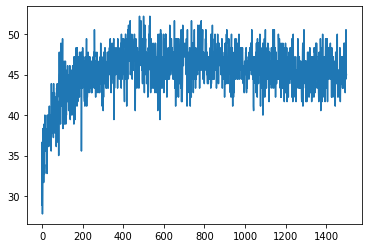

In [57]:
plt.plot(np.arange(len(accuracy_each_epochs)),np.array(accuracy_each_epochs)) 
plt.show()

In [58]:
max(accuracy_each_epochs)

52.22222222222223

In [59]:
len(accuracy_each_epochs)

1500

In [60]:
np.argmax([5,6,3])

1

In [61]:
n.w.shape


(4, 3780)

In [62]:
n.dw

array([[ 7.86344795e-05,  3.39114906e-05,  7.75674227e-06, ...,
         2.14321333e-05,  1.09080546e-04,  8.40785560e-05],
       [ 3.78448877e-03,  1.63207865e-03,  3.73313389e-04, ...,
         1.03147714e-03,  5.24978486e-03,  4.04649911e-03],
       [-3.36950518e-03, -1.45311502e-03, -3.32378156e-04, ...,
        -9.18371746e-04, -4.67412598e-03, -3.60278509e-03],
       [ 2.97206396e-03,  1.28171662e-03,  2.93173355e-04, ...,
         8.10047596e-04,  4.12280161e-03,  3.17782794e-03]])

In [63]:
def test(x):
  print(4*x**3-9*x**2)
  return 4*x**3-9*x**2

In [64]:
x = 1.170510442939238
x-test(x)*0.01

-5.916011670512039


1.2296705596443582

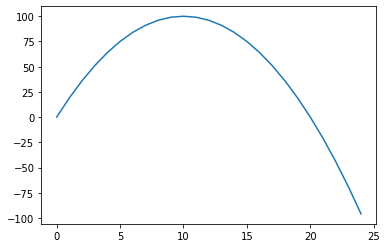

In [65]:
def parabola(x):
    return -1*x**2+20*x
x = np.arange(25)
y = []
for i in x:
    y.append(parabola(i))
y = np.array(y)
plt.plot(x,y) 
plt.show()